# Understanding data

Hensikt å forstå innhenta rådata

In [1]:
# Loading the Dataset

import pandas as pd

file_name = "../data/blindern.csv" 
try:
    data = pd.read_csv(file_name)
except FileNotFoundError:
    print(file_name, "does not exist")

data.head()

,Navn;Stasjon;Tid(norsk normaltid);Maksimumstemperatur (døgn);Minimumstemperatur (døgn);Middeltemperatur (døgn);Snødybde;Nedbør (døgn);Middel av middelvind fra hovedobs. (døgn);Middel av høye vindkastverdier (døgn)
0,Oslo - Blindern;SN18700;01.01.2014;5.1;2.0;3.4...
1,Oslo - Blindern;SN18700;02.01.2014;3.5;1.6;2.7...
2,Oslo - Blindern;SN18700;03.01.2014;5.7;2.2;4.2...
3,Oslo - Blindern;SN18700;04.01.2014;6.0;3.2;4.8...
4,Oslo - Blindern;SN18700;05.01.2014;5.7;2.7;3.7...


In [2]:
# Understanding the Dataset

print('type:', type(data))
print('shape:', data.shape)

print(data.dtypes)
print("")
data.info()

type: <class 'pandas.core.frame.DataFrame'>
shape: (4018, 1)
Navn;Stasjon;Tid(norsk normaltid);Maksimumstemperatur (døgn);Minimumstemperatur (døgn);Middeltemperatur (døgn);Snødybde;Nedbør (døgn);Middel av middelvind fra hovedobs. (døgn);Middel av høye vindkastverdier (døgn)    object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                 --------------  ----- 
 0   Navn;Stasjon;Tid(norsk normaltid);Maksimumstemperatur (døgn);Minimumstemperatur (døgn);Middeltemperatur

In [3]:
data.tail()

,Navn;Stasjon;Tid(norsk normaltid);Maksimumstemperatur (døgn);Minimumstemperatur (døgn);Middeltemperatur (døgn);Snødybde;Nedbør (døgn);Middel av middelvind fra hovedobs. (døgn);Middel av høye vindkastverdier (døgn)
4013,Oslo - Blindern;SN18700;27.12.2024;5.2;1.7;2.5...
4014,Oslo - Blindern;SN18700;28.12.2024;3.2;1.5;2.1...
4015,Oslo - Blindern;SN18700;29.12.2024;4.6;1.7;3.6...
4016,Oslo - Blindern;SN18700;30.12.2024;5.5;-1.6;0....
4017,Oslo - Blindern;SN18700;31.12.2024;-0.2;-3.8;-...


Ettersom vi tidligere så at det kun var en kolonne så vil det være naturlig å endre dette til videre analyse av data, for å få mer ut av evaluering til "data cleaning". Vi sjekker også hvilke type data det er i kolonnene

In [4]:
df = pd.read_csv(file_name,skipfooter=1, engine='python',delimiter=";")

# Endrer navn på kolonnene for bedre oversikt og gjorde om dato til datetime format
print(df.dtypes)
df.columns = ["Navn", "Stasjon", "Tid", "Makstemp", "Mintemp","Middeltemp", "Snø", "Nedbør", "Middelvind", "Høye vindkast"]
numeric_columns = ["Makstemp", "Mintemp","Middeltemp", "Snø", "Nedbør", "Middelvind","Høye vindkast"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df["Tid"] = pd.to_datetime(df["Tid"], format="%d.%m.%Y")


df.describe()

Navn                                          object
Stasjon                                       object
Tid(norsk normaltid)                          object
Maksimumstemperatur (døgn)                   float64
Minimumstemperatur (døgn)                    float64
Middeltemperatur (døgn)                       object
Snødybde                                      object
Nedbør (døgn)                                float64
Middel av middelvind fra hovedobs. (døgn)    float64
Middel av høye vindkastverdier (døgn)        float64
dtype: object


,Tid,Makstemp,Mintemp,Middeltemp,Snø,Nedbør,Middelvind,Høye vindkast
count,4017,4017.000000,4017.000000,4016.000000,3788.000000,4017.000000,4017.000000,4017.000000
mean,2019-07-02 00:00:00,11.605054,4.153946,7.620369,4.214097,2.455141,2.704033,5.564302
min,2014-01-01 00:00:00,-15.900000,-23.100000,-18.800000,0.000000,0.000000,0.600000,1.500000
25%,2016-10-01 00:00:00,4.200000,-0.900000,1.700000,0.000000,0.000000,1.900000,4.000000
50%,2019-07-02 00:00:00,11.400000,3.600000,7.100000,0.000000,0.100000,2.500000,5.200000
75%,2022-04-01 00:00:00,19.400000,10.400000,14.600000,1.000000,2.300000,3.300000,6.800000
max,2024-12-30 00:00:00,34.600000,21.700000,25.900000,59.000000,72.800000,8.400000,16.300000
std,NaN,9.050184,7.248129,7.855424,10.175193,5.441705,1.134709,2.226291


Ser at spennet i værdataene er ulik for kategoriene, som betyr at "threshold" som er med på å luke ut ekstreme avvik kan være forskjellig avhegig av kategori. Plotter data for hver kolonne, og sjekker om det er "outliers" for å avgjøre hvorvidt max. og min. er reelle sammenlignet med de andre dataene.

C:\Users\livem\AppData\Local\Temp\ipykernel_13848\705695546.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sno_filled = df['Snø'].fillna(method='ffill', inplace=False)


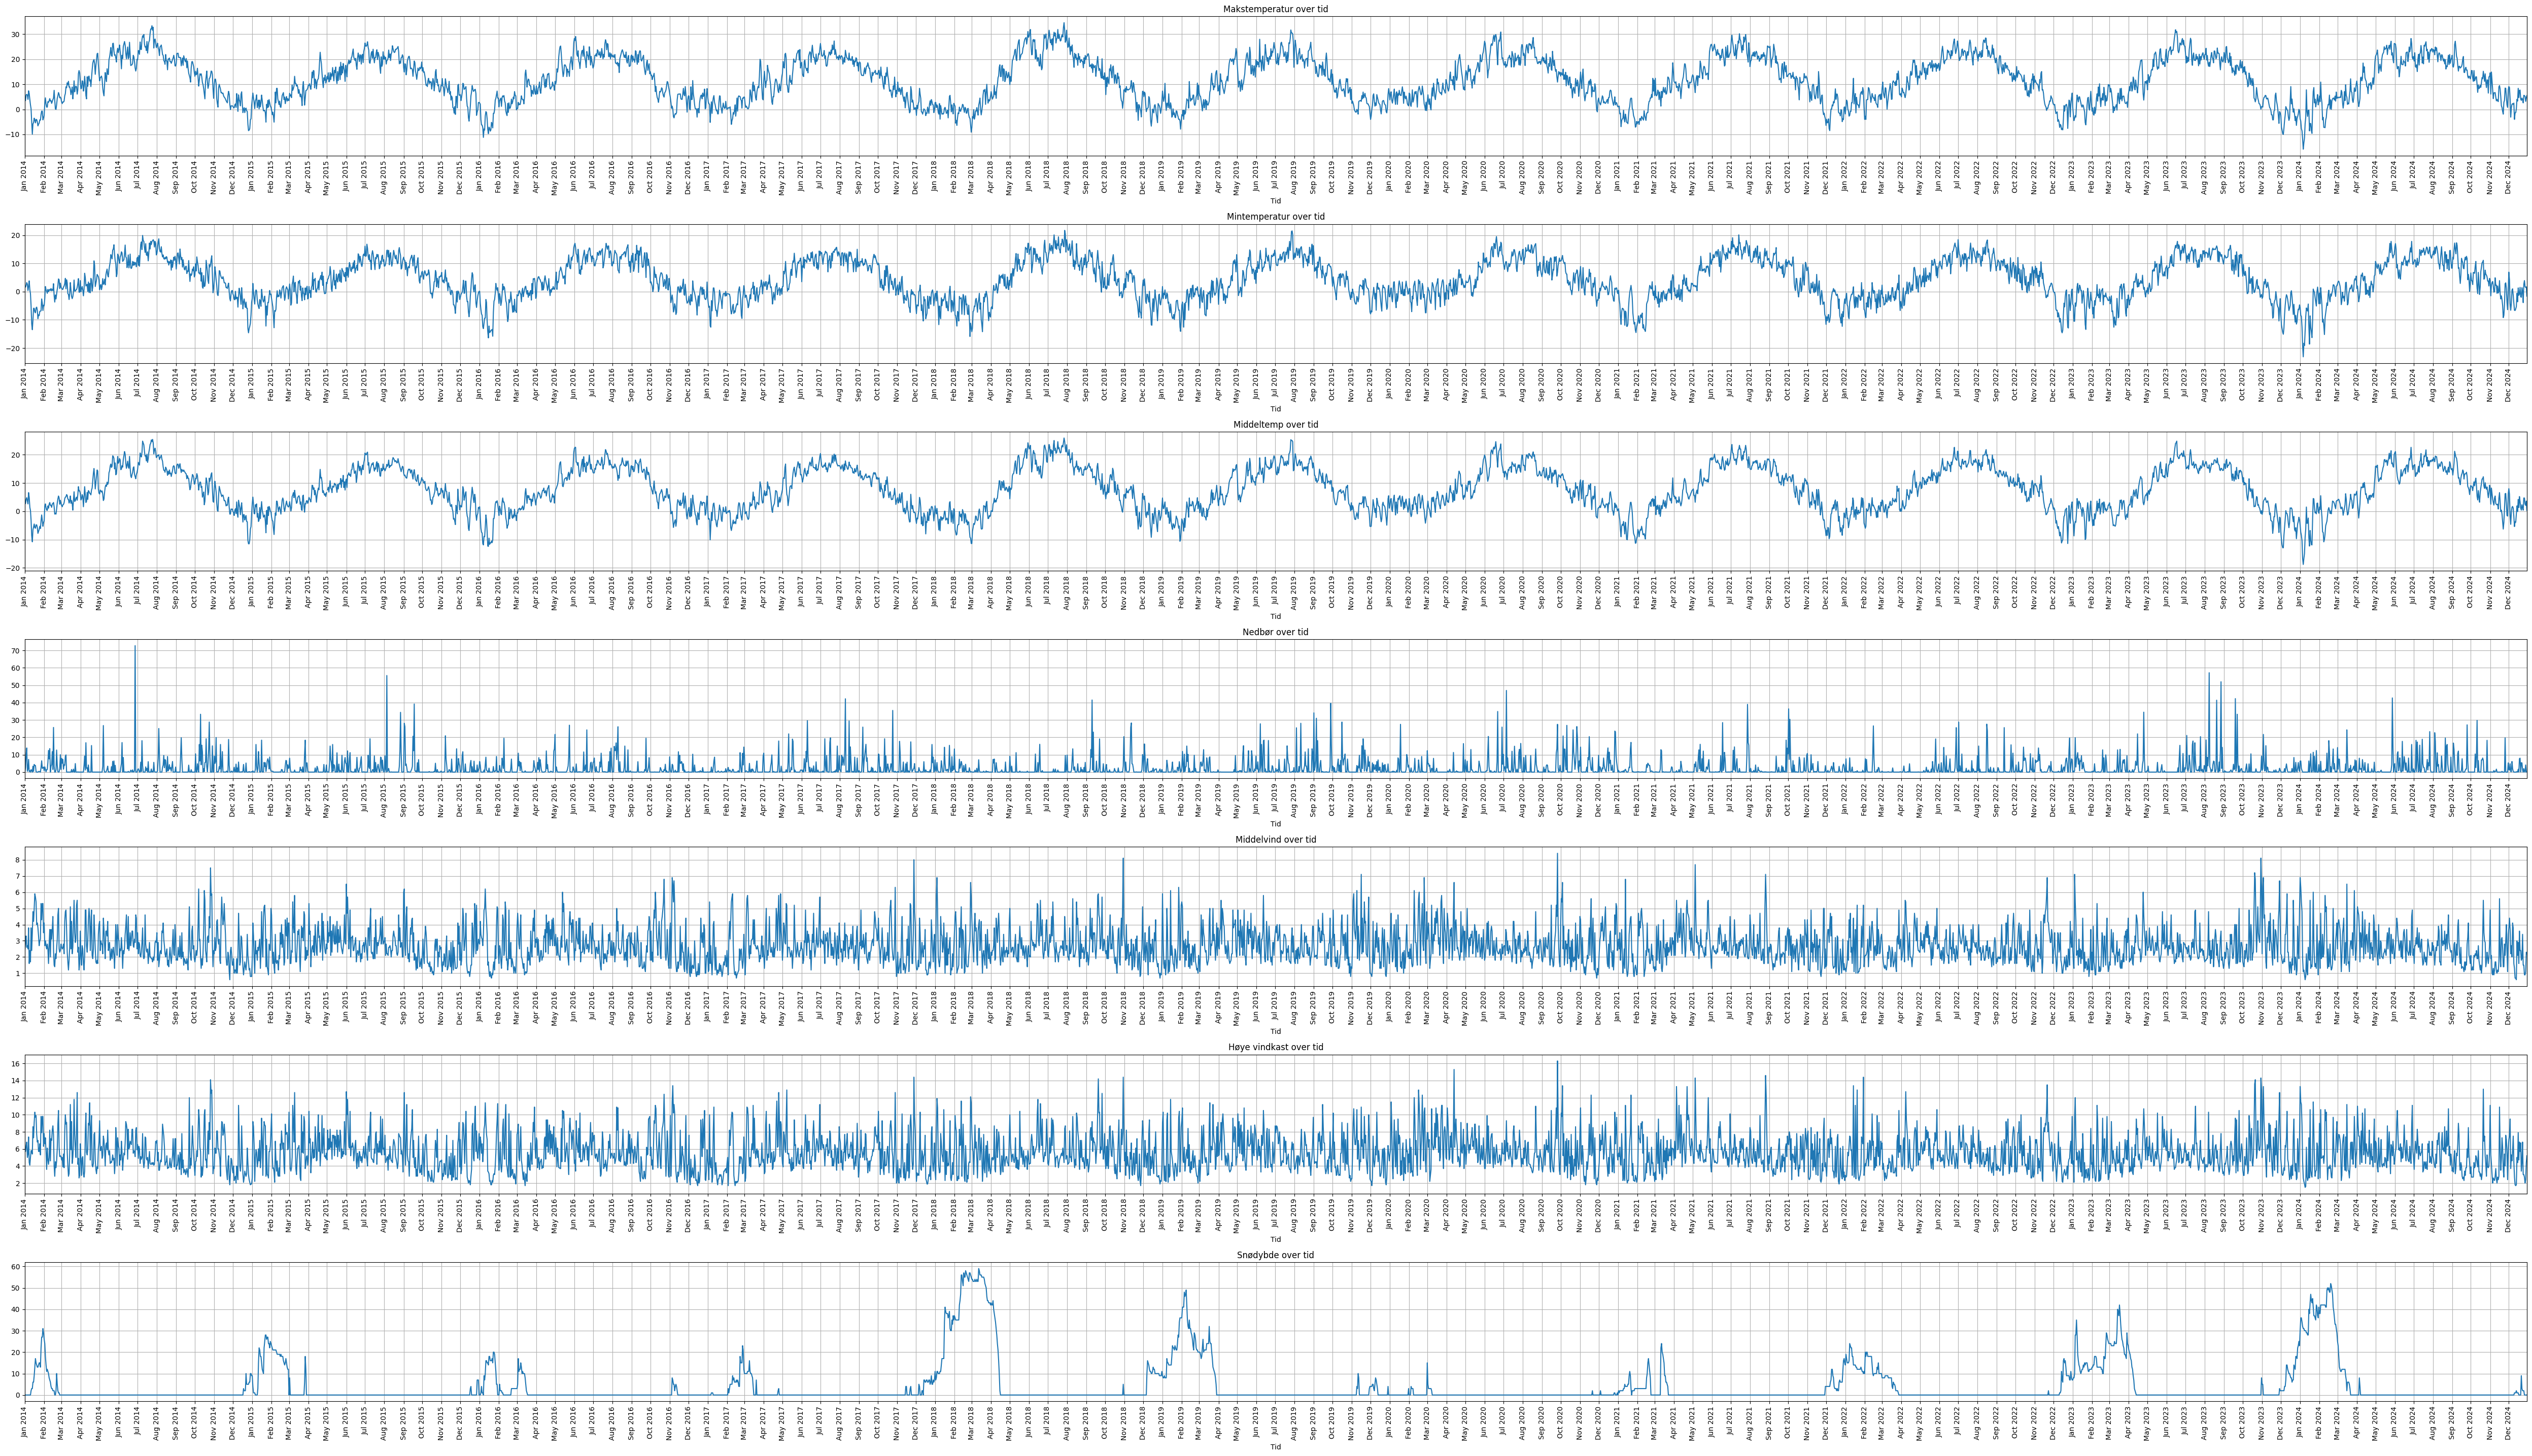

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df['Tid'] = pd.to_datetime(df['Tid'])
df.set_index('Tid', inplace=True)
fig, ax = plt.subplots(7,1,figsize=(50, 30))
# Plotte data
df['Makstemp'].plot(title="Makstemperatur over tid", ax=ax[0])
df['Mintemp'].plot(title="Mintemperatur over tid", ax=ax[1])
df['Middeltemp'].plot(title="Middeltemp over tid", ax=ax[2])
df['Nedbør'].plot(title="Nedbør over tid", ax=ax[3])
df['Middelvind'].plot(title="Middelvind over tid", ax=ax[4])
df['Høye vindkast'].plot(title="Høye vindkast over tid", ax=ax[5])




#Siden "Snø"-kolonne inneholder noen ikke-målte verdier "-", blir disse verdiene bytte om til NaN for manglende data behandling
df['Snø'] = pd.to_numeric(df['Snø'], errors='coerce') 
sno_filled = df['Snø'].fillna(method='ffill', inplace=False)
sno_filled.plot(title="Snødybde over tid", ax=ax[6])

#gi x-aksen verdier månedsvis
for a in ax:
    a.xaxis.set_major_locator(mdates.MonthLocator())
    a.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    a.grid(True)
    a.tick_params(axis='x', rotation=90)
    


plt.tight_layout(rect=[0, 0, 1, 0.96]) 

plt.grid(True)
plt.show()



Velger "threshold" til å bli 3.5 for maks- og minste temperatur og vind, mens 10 for nedbør og snø.